# Health Data Analysis with Seaborn

## Task Description
You have data on health, demographic, and economic indicators of countries over the years. Your task is to conduct an advanced analysis and visualize trends using **Seaborn**.

## Analysis Steps

### 1. **Data Preparation**
- Load the dataset.
- Check for missing values and handle them appropriately (e.g., fill with the median or remove rows).

### 2. **Exploratory Data Analysis (EDA) with Seaborn:**
- **Correlation Heatmap:** Examine relationships between `Life Expectancy` and other numerical variables.
- **Scatterplot for GDP and Life Expectancy:** Use `GDP` on the X-axis and `Life Expectancy` on the Y-axis. Color points based on `Status` (Developed/Developing) and size based on `Population`.
- **Boxplot for BMI:** Compare `BMI` indicators in developed and developing countries.
- **Pairplot for selected variables:** Choose 4-5 variables (e.g., `Life Expectancy`, `HIV/AIDS`, `GDP`, `Schooling`, `Total Expenditure`) and create a `pairplot`.

### 3. **Advanced Analyses:**
- **Regression between education and life expectancy:** Use `lmplot` to check if years of schooling (`Schooling`) impact `Life Expectancy`.
- **Trends over time (lineplot):** Select a few countries and plot `Life Expectancy` trends over the years (`Year`).

### 4. **Additional Challenge:**
- Create a **FacetGrid** showing the relationship between `Alcohol` and `Life Expectancy`, separately for developed and developing countries.
- Try to identify the **most influential factor** for `Life Expectancy` based on visualizations.

## **Bonus**
Enhance the aesthetics:
- Set a style (`set_style`), color palette (`color_palette`),
- Adjust font sizes (`set_context`),
- Use a logarithmic scale in the GDP plot.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data\\Life_Expectancy_Data.csv")

print(df.head())
df = df.dropna()

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      

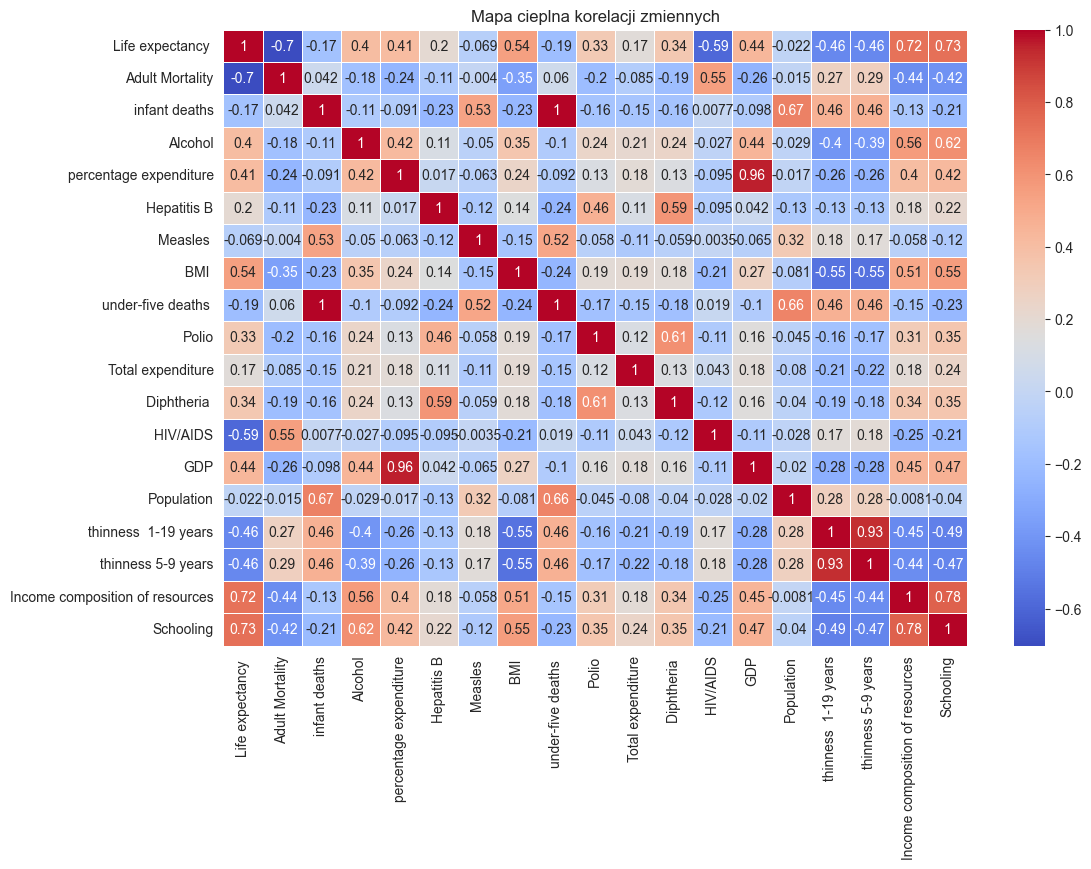

In [2]:
# Correlation heatmap
df_numeric = df.select_dtypes(include=["number"])

df_numeric = df_numeric.dropna()
df_numeric = df_numeric.drop(columns=['Year'])

corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa cieplna korelacji zmiennych")
plt.show()

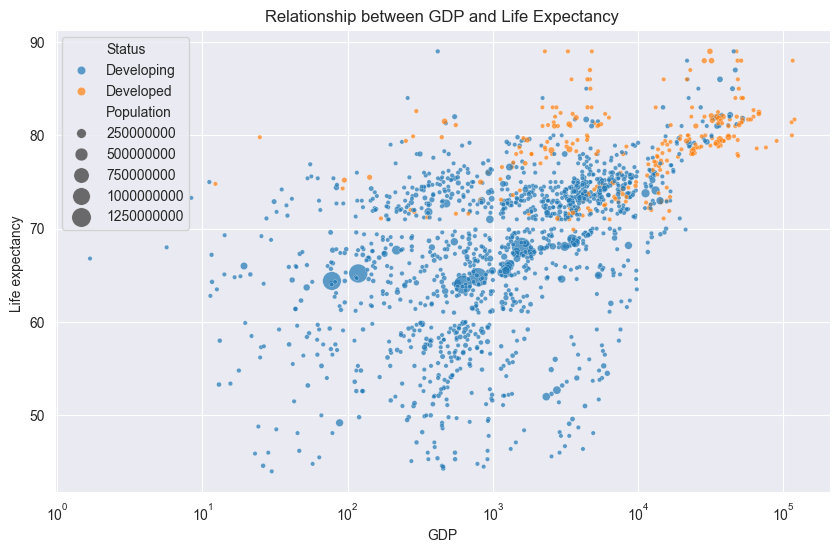

In [3]:
# 2. Scatterplot for GDP and Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="GDP", y="Life expectancy ", hue="Status", size="Population", sizes=(10, 200), alpha=0.7
)
plt.xscale("log")
plt.title("Relationship between GDP and Life Expectancy")
plt.show()


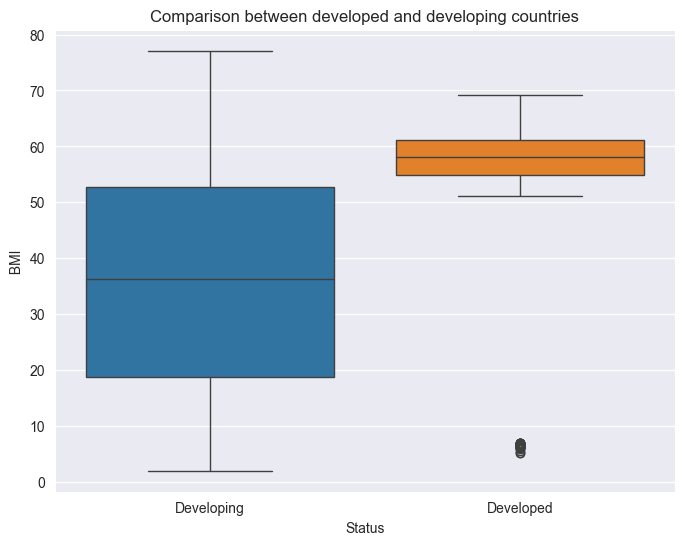

In [4]:
# 3. BMI Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Status", y=" BMI ", hue ="Status", legend = False)
plt.title("Comparison between developed and developing countries")
plt.show()




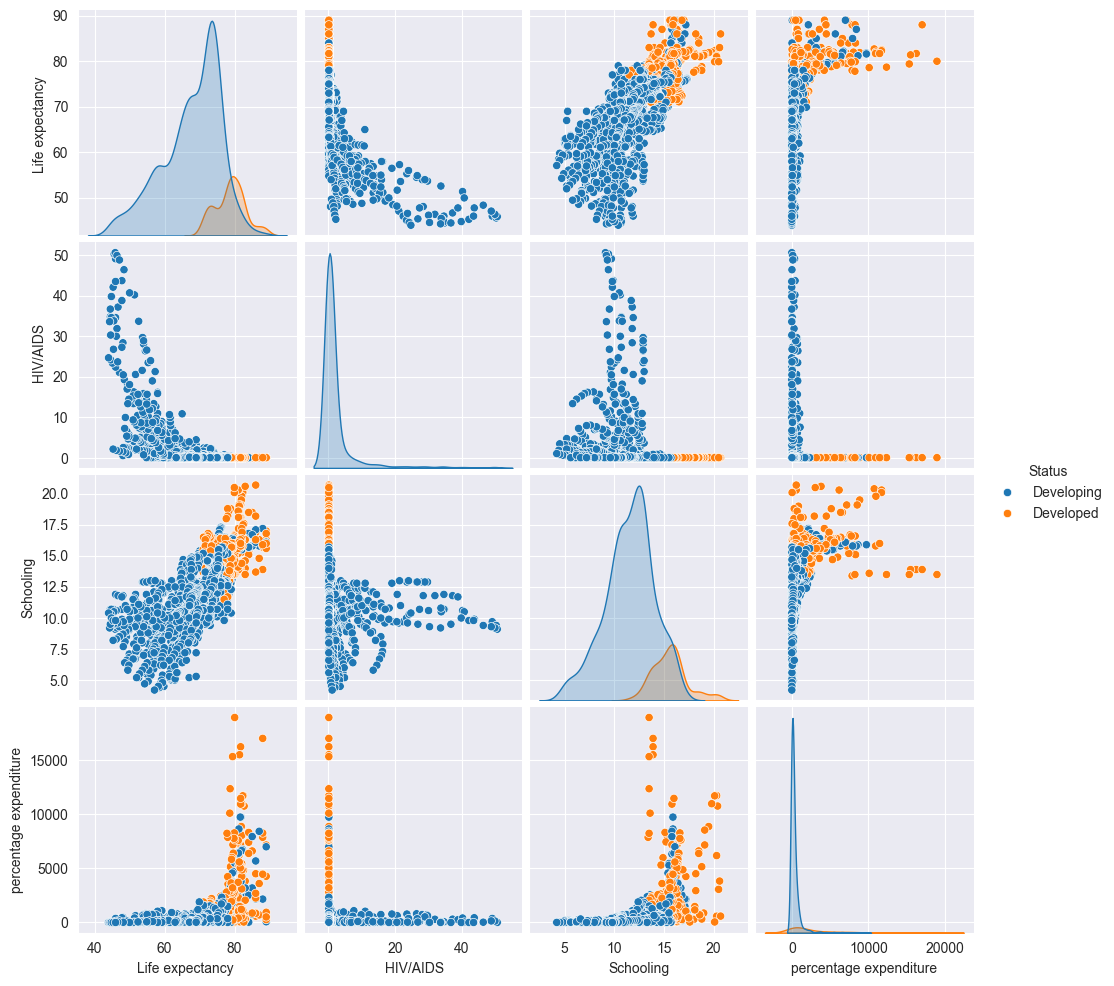

In [5]:
 # 4. Pairplot for choosen variables
selected_columns = ["Life expectancy ", " HIV/AIDS", "Schooling", "percentage expenditure"]
sns.pairplot(data = df, hue = 'Status', vars =selected_columns, diag_kind="kde")
plt.show()


<Figure size 800x600 with 0 Axes>

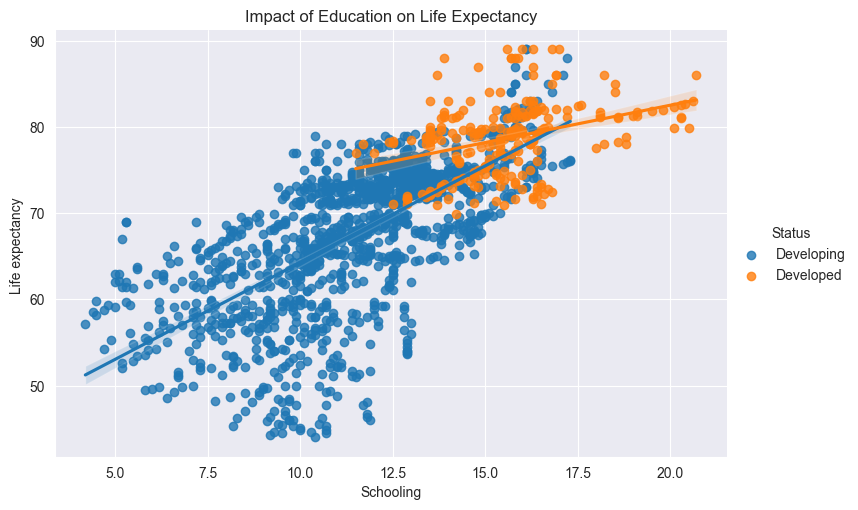

In [6]:
# 5. Education and life expectancy linear regression
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x="Schooling", y="Life expectancy ", hue="Status", aspect=1.5)
plt.title("Impact of Education on Life Expectancy")
plt.show()

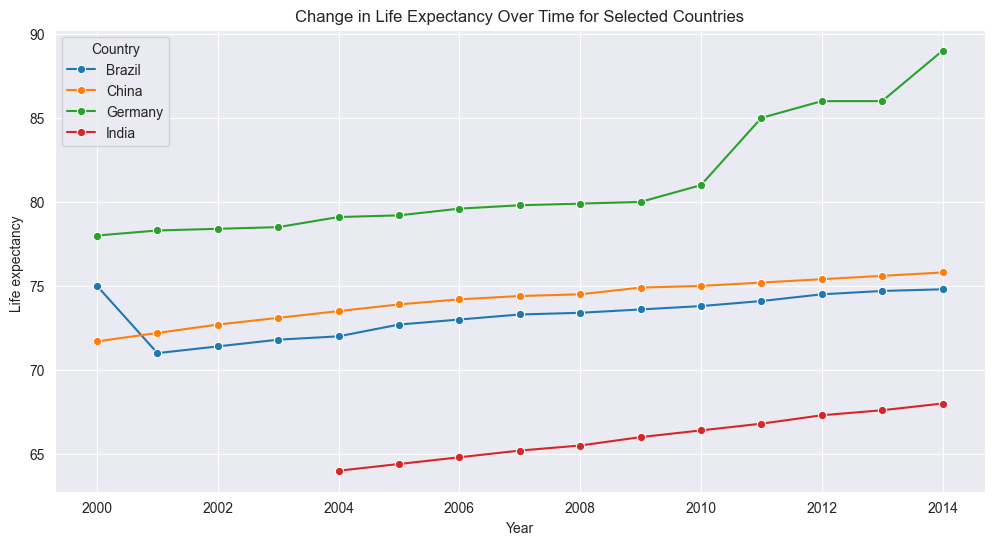

In [7]:
# 6. Trends for chosen countries
selected_countries = ["United States", "India", "China", "Germany", "Brazil"]
df_selected = df[df["Country"].isin(selected_countries)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x="Year", y="Life expectancy ", hue="Country", marker="o")
plt.title("Change in Life Expectancy Over Time for Selected Countries")
plt.show()



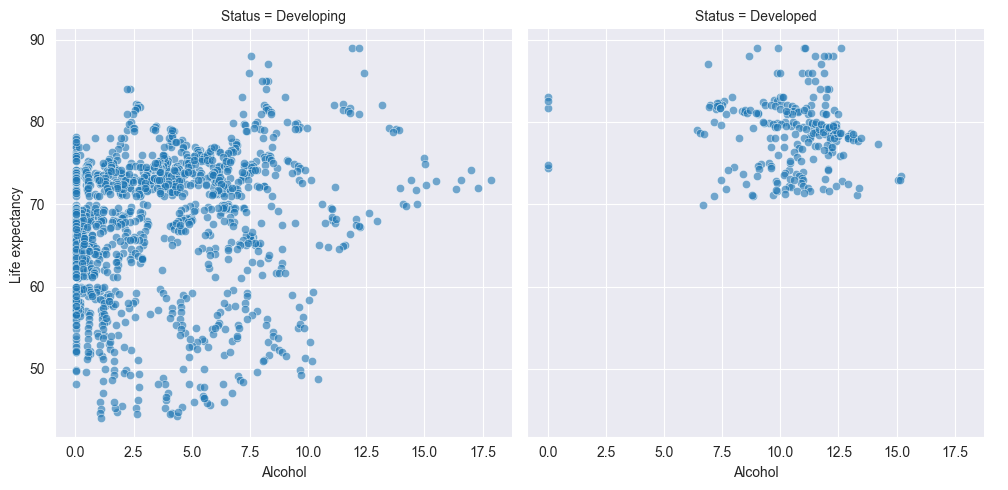

In [8]:
# 7. FacetGrid for Alcohon and Life Expectancy
g = sns.FacetGrid(df, col="Status", height=5)
g.map(sns.scatterplot, "Alcohol", "Life expectancy ", alpha=0.6)
g.add_legend()
plt.show()

sns.set_style("darkgrid")
sns.set_palette("muted")
sns.set_context("talk")